In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 

# scTRS tools
import scTRS.util as util
import scTRS.data_loader as dl
import scTRS.method as md

# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
OUT_PATH = '/n/holystore01/LABS/price_lab/Users/mjzhang/scTRS_data/results/fig_schema'
DATA_PATH='/n/holystore01/LABS/price_lab/Users/mjzhang/scTRS_data'
adata=dl.load_tms_processed(DATA_PATH, data_name='facs', tissue='MAT')['MAT']
fpath=DATA_PATH+'/score_file/score.tms_facs_with_cov.magma_10kb_1000/PASS_Rheumatoid_Arthritis.full_score.gz'
df_score=pd.read_csv(fpath, sep='\t', index_col=0)

# load_tms_processed: load facs data, tissue=[MAT]


/n/holystore01/LABS/price_lab/Users/mjzhang/myenv_gf/lib/python3.7/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/n/holystore01/LABS/price_lab/Users/mjzhang/myenv_gf/lib/python3.7/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


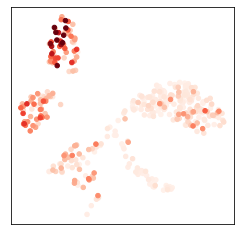

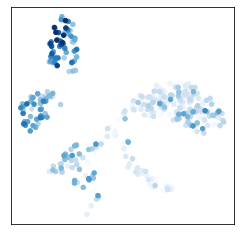

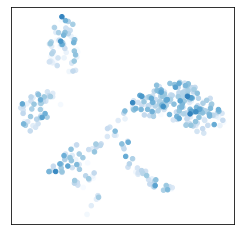

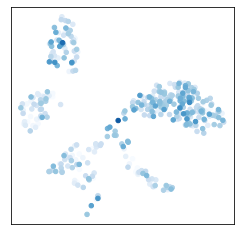

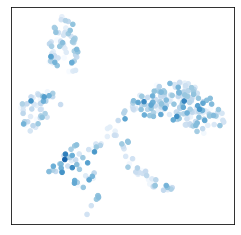

In [5]:
df_plot = pd.DataFrame(index=adata.obs_names, data={'UMAP1':adata.obsm['X_umap'][:,0],
                                                    'UMAP2':adata.obsm['X_umap'][:,1]})
df_plot = df_plot.loc[np.random.choice(df_plot.index, size=400, replace=False)].copy()
df_plot = df_plot.join(df_score)

# log10 p-value
term = 'nlog10_pval'
df_plot.sort_values(term, inplace=True)
plt.figure(figsize=[4,4])
plt.scatter(df_plot['UMAP1'], df_plot['UMAP2'], c=df_plot[term], cmap='Reds', s=20, vmin=-0.1, vmax=4)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig(OUT_PATH+'/umap_%s.svg'%term)
plt.show()

# Scores
vmax=np.quantile(df_plot['norm_score'], 0.99)
vmin=np.quantile(df_plot['norm_score'], 0.1)
for term in ['norm_score', 'ctrl_norm_score_0', 'ctrl_norm_score_1', 'ctrl_norm_score_2']:
    df_plot.sort_values(term, inplace=True)
    plt.figure(figsize=[4,4])
    plt.scatter(df_plot['UMAP1'], df_plot['UMAP2'], c=df_plot[term], cmap='Blues', s=20, vmax=vmax, vmin=vmin)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.savefig(OUT_PATH+'/umap_%s.svg'%term)
    plt.show()

In [142]:
# Plots for standardization 
df_plot = pd.DataFrame(index=adata.obs_names, data={'UMAP1':adata.obsm['X_umap'][:,0],
                                                    'UMAP2':adata.obsm['X_umap'][:,1]})
df_plot = df_plot.loc[np.random.choice(df_plot.index, size=400, replace=False)].copy()
df_plot = df_plot.join(df_score)

print()

,UMAP1,UMAP2,raw_score,norm_score,mc_pval,pval,nlog10_pval,zscore,ctrl_norm_score_0,ctrl_norm_score_1,...,ctrl_norm_score_490,ctrl_norm_score_491,ctrl_norm_score_492,ctrl_norm_score_493,ctrl_norm_score_494,ctrl_norm_score_495,ctrl_norm_score_496,ctrl_norm_score_497,ctrl_norm_score_498,ctrl_norm_score_499
index,,,,,,,,,,,,,,,,,,,,,
K13_B001190_S289.mus-7-0-1,-8.591030,7.585724,0.078718,0.682184,0.239521,0.240939,0.618093,0.703286,0.872004,-1.086186,...,-0.203895,0.240073,0.857071,-0.568352,-0.791627,1.247089,0.789905,1.071553,1.255202,-0.173952
C12.D045064.3_38_F.1.1-1-1,-5.890996,8.539342,0.091795,3.778899,0.001996,0.000379,3.420806,3.367341,0.283498,-0.299850,...,1.487959,0.030721,-1.082499,-1.297147,-0.116534,-1.675443,-0.429900,-0.012682,0.910170,0.215354
M8_B003022_B008546_S296.mm10-plus-7-0,10.947937,1.135735,0.072433,-0.597800,0.718563,0.716614,0.144715,-0.572811,-1.438157,0.072795,...,-0.473267,-0.630238,-0.160429,0.030673,0.538145,-0.188647,1.138567,0.312231,-2.034685,1.460279
K14_B001183_S194_L003.mus-1-0-1,-10.526948,0.322389,0.084828,2.874890,0.003992,0.004096,2.387677,2.644081,-0.528543,0.018398,...,-1.175814,0.653882,1.531647,-0.628940,1.541806,-1.793556,-1.040692,-0.160610,0.467324,-1.827281
L9_B001183_S213_L003.mus-1-0-1,-9.430625,7.769223,0.094086,3.490317,0.001996,0.000847,3.072264,3.139317,0.313643,-1.334630,...,-0.306467,-0.399271,-0.834486,1.409100,-0.632886,-0.179233,-0.513865,0.912609,0.347573,-1.322114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I21_B001183_S153_L003.mus-1-0-1,5.216518,-10.093549,0.066044,-1.241668,0.904192,0.897985,0.046731,-1.270153,-0.591237,-0.603311,...,-0.064935,-0.934051,-0.920592,0.185750,1.738123,1.388062,-1.458221,-0.082021,0.490358,-0.225605
G16_B000477_B008543_S160.mm10-plus-6-0,-4.351490,-8.087927,0.051927,-1.297070,0.910180,0.908553,0.041650,-1.331895,0.646829,-0.427519,...,1.277629,0.485643,0.524577,0.816251,-0.288546,1.931770,0.500180,1.803680,-0.154942,1.221672
C5_B000795_B008545_S53.mm10-plus-3-0,3.239603,1.978564,0.061176,-1.304916,0.908184,0.909988,0.040964,-1.340681,1.915054,0.106545,...,1.744057,-0.957598,-0.444898,-0.937338,1.006127,-0.896805,0.946717,0.082930,-1.029263,-1.371770


In [130]:
adata_raw = dl.load_tms_ct(DATA_PATH, data_name='facs', flag_size_factor=True, 
                           total_ct_per_cell=1e4, flag_log1p=True)
adata_raw = adata_raw[adata_raw.obs['tissue']=='MAT'].copy()
md.compute_stats(adata_raw)

Trying to set attribute `.obs` of view, copying.


In [16]:
plt.figure(figsize=[4,4])
plt.scatter(adata_raw.var['ct_mean'], adata_raw.var['ct_var'], s=4)
plt.scatter(adata_raw.var['ct_mean'], adata_raw.var['ct_var_tech'], s=4)
plt.xlim([0,15])
plt.ylim([0,400])
plt.xlabel('Mean expression')
plt.ylabel('Variance')
plt.show()

NameError: name 'adata_raw' is not defined

<Figure size 288x288 with 0 Axes>

In [133]:
adata_raw.var

,n_cells,mean,var,ct_mean,ct_var,ct_var_tech,var_tech
index,,,,,,,
0610005C13Rik,3939,0.000598,0.000458,0.000916,0.001240,0.001009,0.000372
0610007C21Rik,61891,0.641091,0.544413,1.591494,6.191442,11.756535,1.033751
0610007L01Rik,36115,0.238151,0.255390,0.551078,3.111293,3.076754,0.252555
0610007N19Rik,19591,0.143139,0.090025,0.224416,0.331807,1.069770,0.290247
0610007P08Rik,12581,0.060333,0.058047,0.112415,0.338212,0.504108,0.086519
...,...,...,...,...,...,...,...
Zyg11a,276,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
Zyg11b,23165,0.107429,0.109314,0.217594,0.855427,1.035572,0.132335
Zyx,58021,0.694474,0.748777,2.283321,26.911591,19.157921,0.533042
